In [1]:
##importar librerias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocesamiento de datos
#Encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
#Separacion de datos
from sklearn.model_selection import train_test_split
#Modelo
from sklearn.tree import DecisionTreeClassifier
#Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import tree

In [ ]:
##cargar datasets, revisar tipos de datos
proyecto = pd.read_csv('C:\\Users\\JOAQUIN\\Desktop\\PI\\PI02_DATA05\\Datathon\\hospitalizaciones_train.csv')
proyecto.dtypes

In [ ]:
proyecto

In [ ]:
#contar valores
proyecto.value_counts()

In [ ]:
proyecto.nunique()

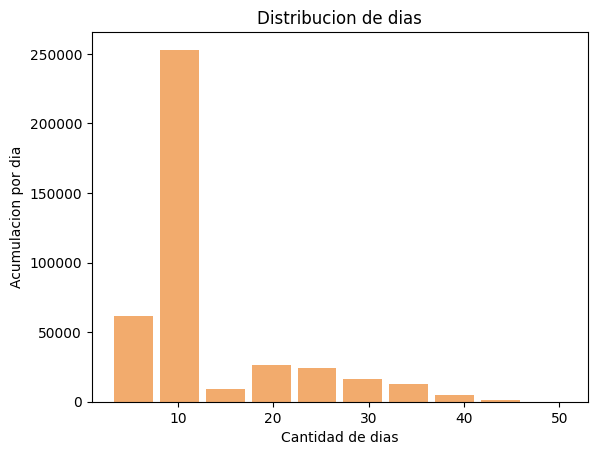

In [6]:
## histograma para comprobar distribucion de dias

plt.hist(x=proyecto['Stay (in days)'], color='#F2AB6D', rwidth=0.85)
plt.title('Distribucion de dias')
plt.xlabel('Cantidad de dias')
plt.ylabel('Acumulacion por dia')
plt.show() 

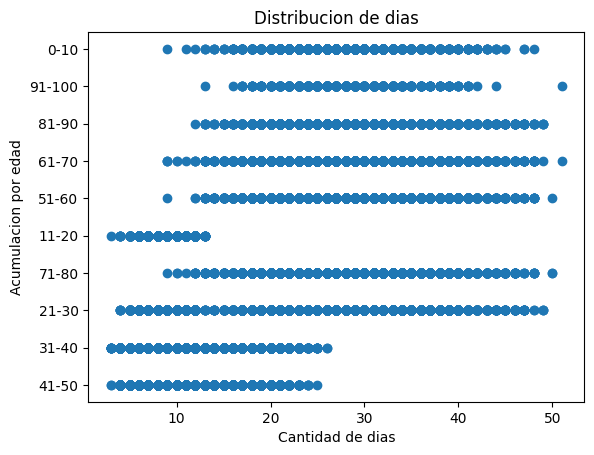

In [7]:
plt.scatter(x=proyecto['Stay (in days)'], y=proyecto['Age'])
plt.title('Distribucion de dias')
plt.xlabel('Cantidad de dias')
plt.ylabel('Acumulacion por edad')
plt.show() 

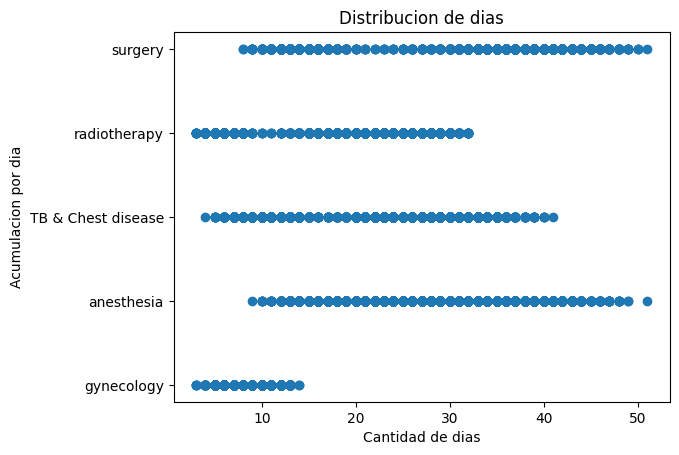

In [14]:
plt.scatter(x=proyecto['Stay (in days)'], y=proyecto['Department'])
plt.title('Distribucion de dias')
plt.xlabel('Cantidad de dias')
plt.ylabel('Acumulacion por departamento')
plt.show() 

In [ ]:
##eliminar duplicados para evitar que el modelo asigne mas pesos a eso casos
proyecto.drop_duplicates()

In [8]:
##dropear columnas con informaicon que podrian sesgar al modelo
#Nombre de el/la doctor/a a cargo del paciente
proyecto.drop(['doctor_name'], axis=1, inplace=True)
# es el codigo de la habitacion del paciente, no aportaria informacion relevante al problema
proyecto.drop(['Ward_Facility_Code'], axis=1, inplace=True) 
#el id no aporta informacion relevante a este problema
proyecto.drop(['patientid'], axis=1, inplace=True) 
# el deposito de admision sesga el heatmap
proyecto.drop(['Admission_Deposit'], axis=1, inplace=True) 

In [9]:
##agregar columna internacion larga >8dias
proyecto['internacion_larga'] = np.where(proyecto['Stay (in days)']>8, 1, 0)

In [11]:
#cambiar variables ordinales a numericas 
ordinal= OrdinalEncoder()
proyecto['Age'] = ordinal.fit_transform(proyecto[['Age']])

In [12]:
#cambiar variables nominales a numericas 
encoder= LabelEncoder()


proyecto['health_conditions'] = encoder.fit_transform(proyecto['health_conditions'])
proyecto['Department'] = encoder.fit_transform(proyecto['Department'])
proyecto['gender'] = encoder.fit_transform(proyecto['gender'])
proyecto['Type of Admission'] = encoder.fit_transform(proyecto['Type of Admission'])
proyecto['Severity of Illness'] = encoder.fit_transform(proyecto['Severity of Illness'])
proyecto['Insurance'] = encoder.fit_transform(proyecto['Insurance'])


In [13]:
#chequear cambios
proyecto.dtypes

Available Extra Rooms in Hospital      int64
Department                             int32
staff_available                        int64
Age                                  float64
gender                                 int32
Type of Admission                      int32
Severity of Illness                    int32
health_conditions                      int32
Visitors with Patient                  int64
Insurance                              int32
Stay (in days)                         int64
internacion_larga                      int32
dtype: object

In [14]:
#chequear cambios
proyecto


,Available Extra Rooms in Hospital,Department,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Stay (in days),internacion_larga
0,4,2,0,4.0,0,1,0,1,4,1,8,0
1,4,2,2,3.0,0,1,1,2,2,0,9,1
2,2,2,8,2.0,0,1,0,1,2,1,7,0
3,4,2,7,3.0,0,2,2,4,4,0,8,0
4,2,1,10,7.0,1,1,2,1,2,0,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,2,1,3.0,0,1,1,0,3,1,8,0
409996,5,2,5,2.0,0,1,0,5,4,0,9,1
409997,4,2,9,2.0,0,0,1,0,4,1,9,1
409998,10,2,10,2.0,0,1,2,5,2,1,9,1


In [12]:
#buscar correlacion entre features
proyecto.corr()

,Available Extra Rooms in Hospital,Department,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Stay (in days),internacion_larga
Available Extra Rooms in Hospital,1.000000,-0.021235,-0.003064,-0.029921,-0.038214,0.020866,0.024045,0.001643,0.071073,0.002438,-0.019383,0.053894
Department,-0.021235,1.000000,0.016304,0.013096,0.016474,-0.037395,0.014698,-0.000344,-0.034597,-0.000714,-0.204050,-0.173021
staff_available,-0.003064,0.016304,1.000000,0.001818,0.003960,-0.002255,0.002759,-0.001500,0.001444,0.001245,0.006673,0.002883
Age,-0.029921,0.013096,0.001818,1.000000,0.497530,0.005304,0.023350,0.037140,0.030136,-0.002472,0.585201,0.229657
gender,-0.038214,0.016474,0.003960,0.497530,1.000000,0.031566,0.029147,-0.000242,0.048435,0.001657,0.589757,0.193878
Type of Admission,0.020866,-0.037395,-0.002255,0.005304,0.031566,1.000000,-0.070795,0.001768,-0.020353,-0.002062,0.035811,0.006233
Severity of Illness,0.024045,0.014698,0.002759,0.023350,0.029147,-0.070795,1.000000,0.214291,0.030199,0.001924,0.024316,0.017030
health_conditions,0.001643,-0.000344,-0.001500,0.037140,-0.000242,0.001768,0.214291,1.000000,-0.000117,0.008702,0.001772,-0.002568
Visitors with Patient,0.071073,-0.034597,0.001444,0.030136,0.048435,-0.020353,0.030199,-0.000117,1.000000,0.025426,0.027284,-0.009529
Insurance,0.002438,-0.000714,0.001245,-0.002472,0.001657,-0.002062,0.001924,0.008702,0.025426,1.000000,-0.000947,-0.001063


<AxesSubplot:>

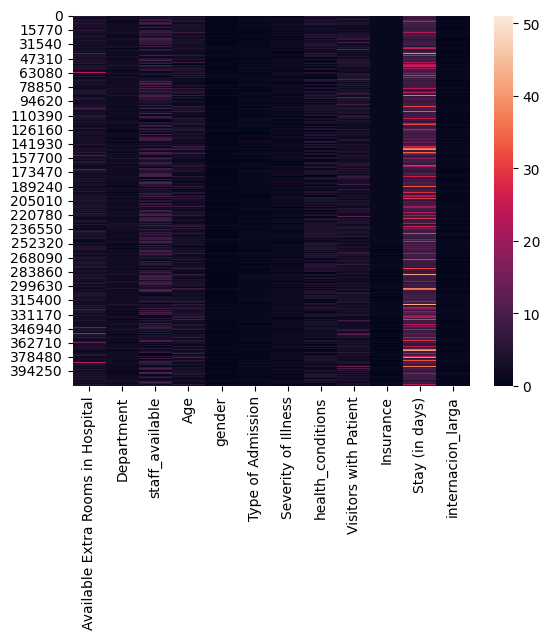

In [10]:
# heatmap para graficar correlaciones
sns.heatmap(proyecto, cmap = 'RdBu')

<AxesSubplot:>

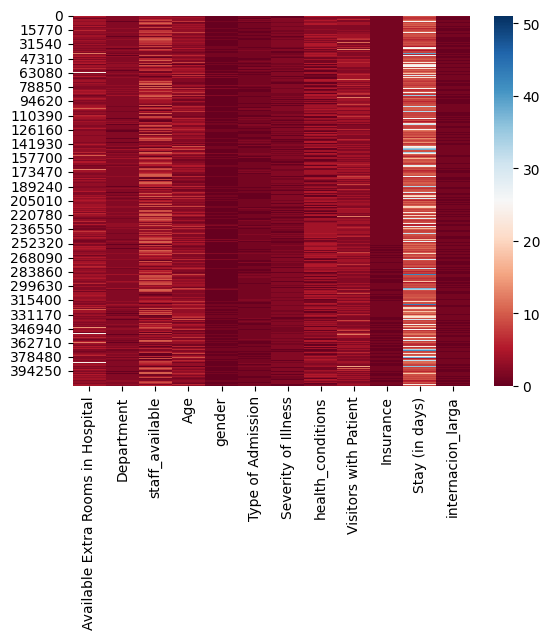

In [11]:
sns.heatmap(proyecto, cmap = 'RdBu')

pareceria que las variables que mas se correlacionan con la estadia, son el departamento, la edad y el genero. probaremos con esas 3 features con el modelo de clasificacion de arbol de decision

In [ ]:
##Elegir  features y variable a predecir
X = proyecto[['Age', 'gender', 'Department']]  
                                                     
y = proyecto.internacion_larga

In [ ]:
# Instanciar el modelo 

arbol = DecisionTreeClassifier(max_depth = 3, random_state = 40) 

#Dividir de los datos en train y test en un 70% y 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

# Entrenar el modelo

arbol.fit(X.values,y.values)

In [ ]:
# Predecir valores
predicciones = arbol.predict(X.values)

In [ ]:
#Chequear accuracy
print(accuracy_score(y,predicciones))

In [ ]:
#Chequear recall
print(recall_score(y,predicciones))

In [ ]:
## Visualizar el arbol de decision
plt.figure(figsize = (10,7))
tree.plot_tree(arbol, filled = True)
plt.show()

In [ ]:
#Exportar predicciones
proyecto_resultado= pd.DataFrame(predicciones, columns= ['pred'])
joaquin2santos = proyecto_resultado
joaquin2santos.to_csv('./joaquin2santos.csv', index=False)